> Created by Teodora Szasz, tszasz@uchicago.edu

# <h1 align="center">4. Interactive Plotting </h1>

### A. Common plots with matplotlib

- Pyplot is a MATLAB-like plotting interface built on top of the matplotlib API.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

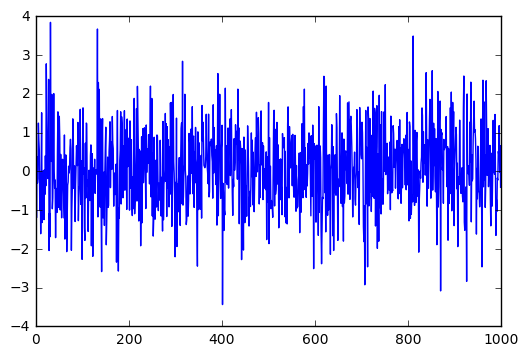

In [3]:
y = np.random.randn(1000)
plt.plot(y)

- By default, the x coordinates are succesive integers. Let's specify the coordinates directly:

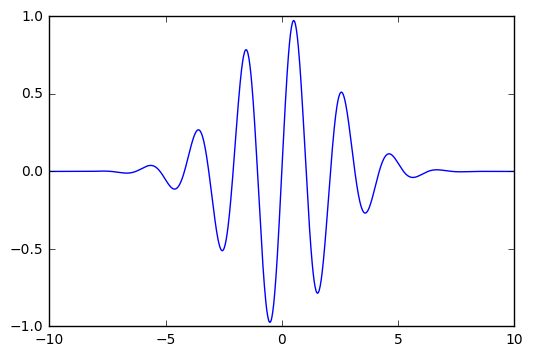

In [4]:
x = np.linspace(-10., 10., 1000)
y = np.sin(3 * x) * np.exp(-.1 * x ** 2)
plt.plot(x,y)

- We can customize the plot. For example:

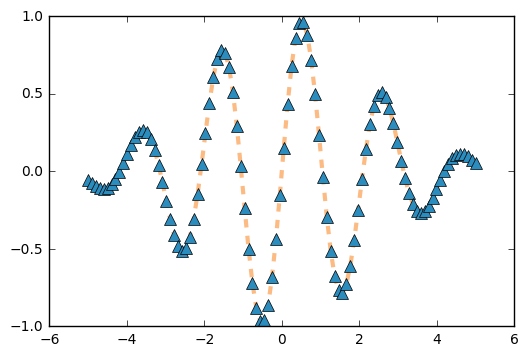

In [5]:
x = np.linspace(-5., 5., 100)
y = np.sin(3 * x) * np.exp(-.1 * x ** 2)
plt.plot(x,y, '--^',
        lw=3, color='#fdbb84',
        mfc='#2b8cbe', ms=8)

### B. Create multiple plots in the same figure

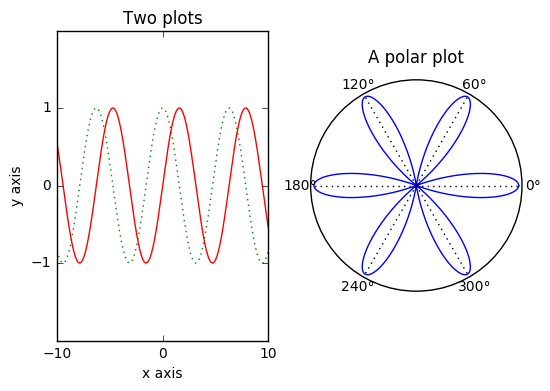

In [6]:
#Left panel

plt.subplot(1, 2, 1)
x = np.linspace(-10., 10., 1000)
plt.plot(x, np.sin(x), '-r', label = 'sinus')
plt.plot(x, np.cos(x), ':g', lw=1, label = 'cosinus')
plt.xticks([-10, 0, 10])
plt.yticks([-1, 0, 1])
plt.ylim(-2, 2)
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Two plots")
plt.legend

#Right panel

plt.subplot(1,2,2,polar=True)
x=np.linspace(0, 2 * np.pi, 1000)
plt.plot(x, 1 + 2 * np.cos(6 * x))
plt.yticks([])
plt.xlim(-.1, 3.1)
plt.ylim(-.1, 3.1)
plt.xticks(np.linspace(0, 5 * np.pi / 3, 6))
plt.title("A polar plot")
plt.grid(color='k', linewidth=1, linestyle=':')

### B. Interacting with matplotlib figures

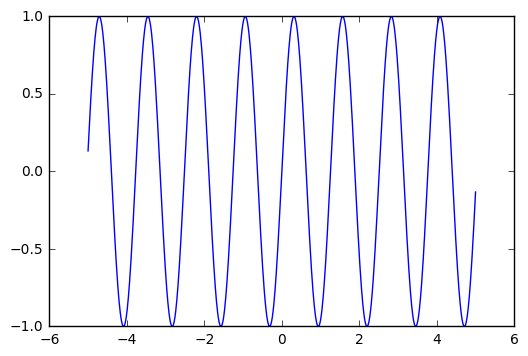

In [7]:
from ipywidgets import interact
x = np.linspace(-5., 5., 1000)
@interact
def plot_sin(a=(1,10)):
    plt.plot(x, np.sin(a*x))
    plt.ylim(-1,1)

- `matplotlib` sometimes require a significant amount of manual tuning to have clean, publication-ready figures.

### C. High-level plotting with seaborn

- The `seaborn` library offers better styling for matplotlib as well as easy-to-use high-level statistical plotting routines on matplotlib
- needs to be installed

In [8]:
import seaborn

 - To see the difference between matplotlib plots and seaborn plots, go at the beginning of the notebook and re-execute a code cell (e.g., [3])

### D. Image processing

- We will use `scikit-image` library
- Needs to be installed

In [9]:
import numpy as np
import skimage
from skimage import img_as_float
import skimage.filters as skif
from skimage.color import rgb2gray
import skimage.data as skid
import skimage.exposure as skie
from ipywidgets import interact
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [10]:
chelsea = skid.chelsea()

In [11]:
chelsea.shape, chelsea.dtype

((300, 451, 3), dtype('uint8'))

(-0.5, 450.5, 299.5, -0.5)

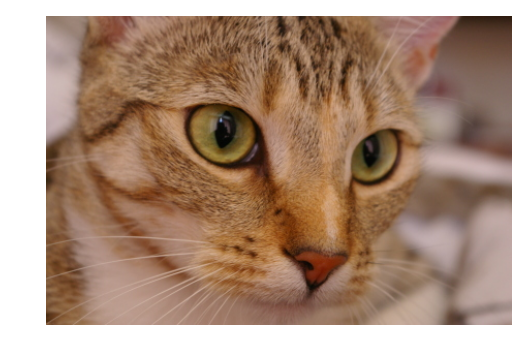

In [12]:
plt.imshow(chelsea)
plt.axis('off')

- Convert this image to a grayscale image:

In [13]:
img = rgb2gray(chelsea)
img.shape, img.dtype

((300, 451), dtype('float64'))

In [14]:
img

array([[ 0.48523098,  0.48523098,  0.47738784, ...,  0.11692392,
         0.11692392,  0.11692392],
       [ 0.49699569,  0.49307412,  0.48523098, ...,  0.12336824,
         0.1225349 ,  0.1272898 ],
       [ 0.50849255,  0.50457098,  0.49475569, ...,  0.12336039,
         0.12728196,  0.13120353],
       ..., 
       [ 0.24786745,  0.29884784,  0.40501294, ...,  0.58914824,
         0.58914824,  0.58914824],
       [ 0.38173647,  0.42487373,  0.39628392, ...,  0.57403529,
         0.57403529,  0.57795686],
       [ 0.42487373,  0.36883294,  0.36042431, ...,  0.55442745,
         0.55442745,  0.55834902]])

(-0.5, 450.5, 299.5, -0.5)

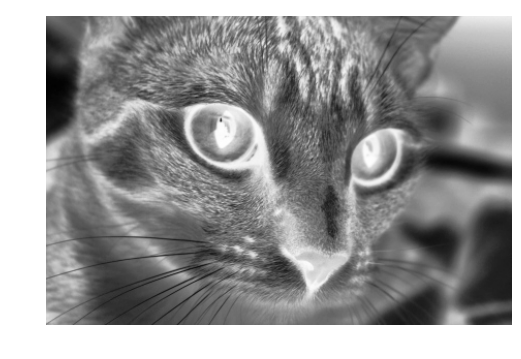

In [15]:
plt.imshow(img)
plt.axis('off')

In [16]:
p2, p98 = np.percentile(img, (2,98))
img_rescale = skie.rescale_intensity(img, in_range=(p2,p98))

In [17]:
img_eq = skie.equalize_hist(img)

In [18]:
img_adapteq = img_as_float(skie.equalize_adapthist(img, clip_limit=0.03))

/Users/rcc/anaconda3/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [19]:
hist_types = dict([('Contrast stretching', img_rescale),
                   ('Histogram equalization', img_eq),
                   ('Adaptive equalization', img_adapteq)])

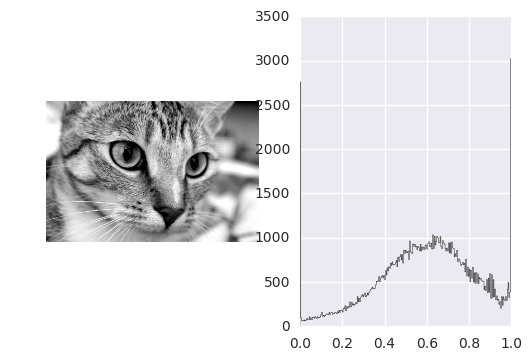

In [20]:
@interact(hist_type=list(hist_types.keys()))
def display_result(hist_type):
    result = hist_types[hist_type]
    
    # We display the processed grayscale image on the left.
    plt.subplot(121)
    plt.imshow(result, cmap='gray')
    plt.axis('off')
    
    # We display the histogram on the right.
    plt.subplot(122)
    plt.hist(result.ravel(), bins=np.linspace(0., 1., 256),
            histtype='step', color='black')
    plt.show()

### Some useful references:

- `pyplot` API: http://matplotlib.org/api/pyplot_api.html
- GUI event loop support in IPython: https://ipython.org/ipython-doc/dev/interactive/reference.html#guy-event-loop-support
- Plot customization options for `pyplot`: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot.
- More about `seaborn`: http://seaborn.pydata.org/
- `scikit-image` library: http://scikit-image.org/